## Exploring Yelp Reviews

In this project, I explored restaurant review data available through the [Yelp Dataset Challenge](https://www.yelp.com/dataset/challenge). The dataset includes Yelp data for user reviews and business information for 10 metropolitan areas. The `data` directory in this repository includes data files for reviews and restaurants in 3 of these cities: Cleveland, Pittsburgh, and Charlotte. These cities were chosen since the data is not too large — the data for the other cities can be downloaded from the Yelp download page. For this assignment, you are welcome to analyze data any of the three cities. 

This project is broken into two parts:

#### Part 1: testing how well sentiment analysis works.

Because Yelp reviews include the number of stars given by the user, the Yelp data set provides a unique opportunity to test how well our sentiment analysis works by comparing the number of stars to the polarity of reviews.

#### Part 2: analyzing correlations between restaurant reviews and census data

I explore geographic trends in the restaurant reviews, comparing our sentiment analysis results with user stars geographically. We'll also overlay review stars on maps of household income (using census data).
    
#### Background readings
- [Does sentiment analysis work?](http://varianceexplained.org/r/yelp-sentiment/)
- [The Geography of Taste: Using Yelp to Study Urban Culture](https://www.mdpi.com/2220-9964/7/9/376/pdf/1)

## 1. Does Sentiment Analysis Work?

In this part, I load the data from Cleveland, perform a sentiment analysis, and explore the results.

In [120]:
import pandas as pd

#here I choose Cleveland restaurant data

reviews=pd.read_json("./data/reviews_cleveland.json.gz",orient='records',lines=True)

In [121]:
reviews.head(5)

,business_id,review_id,stars,text
0,ZNB91myFoOYgyXoG5LQeGQ,36xxeOr4m4UlRf9FM1HzdA,1,I took my wife out for a Birthday dinner with ...
1,anzCdD5eIEHwydTpXhLlUA,4PKiLkFTff9HK44QkOo6vA,4,Heard about this place and was dying to check ...
2,CtYWpX_cy1YdZgoKtS0Tqg,ydehlths0Zpg2gbXPOs6Qw,1,Also don't believe when they say they will giv...
3,QUjJmpTQvGus8WfYq1dtOw,3WAN3SLDZZhcKGazQOdzGg,1,Quite possibly the worst meal I have had in ag...
4,m3DVIvPsuLuA9OMSgWNLcQ,G_4LjxpwN1FAmR0056Ux1w,4,Delicious oatmeal raisin cookie. Cute little s...


### 1.2 Format the review text

The first step is to split the review text into its individual words and make all of the words lower-cased.

Add a new column, called 'formatted_text', which each entry is a list of the lower-cased words in a review.

In [122]:
# I first remove the punctuation, then transform to lowercase and split the words
import string 
def remove_punctuation(sentence):
    """
    Remove punctuation from the input sentence.
    """
    translator = str.maketrans('', '', string.punctuation)
    return sentence.translate(translator)

reviews['text']=reviews['text'].apply(remove_punctuation)

reviews['formatted_text']=reviews['text'].str.lower()
reviews['formatted_text']=reviews['formatted_text'].str.split()
reviews['formatted_text']

0        [i, took, my, wife, out, for, a, birthday, din...
1        [heard, about, this, place, and, was, dying, t...
2        [also, dont, believe, when, they, say, they, w...
3        [quite, possibly, the, worst, meal, i, have, h...
4        [delicious, oatmeal, raisin, cookie, cute, lit...
                               ...                        
82694    [legit, the, worst, place, ive, ever, been, in...
82695    [great, service, okay, food, sat, outside, on,...
82696    [big, fan, of, theirs, ive, been, going, here,...
82697    [we, came, with, our, daughter, who, we, were,...
82698    [well, i, have, been, to, the, blue, point, du...
Name: formatted_text, Length: 82699, dtype: object

### 1.3 Review stop words

Use the `nltk` library to remove any stop words from the list of words in each review. 

Overwrite the 'formatted_text' column to contain a list of lower-cased words in each review, with no stop words. 

In [123]:
import nltk
nltk.download('stopwords');

#Get the list of common stop words
stop_words = list(set(nltk.corpus.stopwords.words('english')))

#Get the list of common punctuation
import string
punctuation = list(string.punctuation)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zheng\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [124]:
ignored = stop_words + punctuation
punctuation = list(string.punctuation)
reviews['formatted_text'] = reviews['formatted_text'].apply(lambda eachReview: [word for word in eachReview if word not in ignored])

In [125]:
reviews['formatted_text'].head()

0    [took, wife, birthday, dinner, daughter, 12161...
1    [heard, place, dying, check, putand, im, glad,...
2    [also, dont, believe, say, give, credit, unsat...
3    [quite, possibly, worst, meal, ages, service, ...
4    [delicious, oatmeal, raisin, cookie, cute, lit...
Name: formatted_text, dtype: object

### 1.4 Calculate polarity and subjectivity

Using the formatted text column, create a list of `textblob.TextBlob()` objects and then extract the `subjectivity` and `polarity`. Add two new columns to the review DataFrame: `polarity` and `subjectivity`.


### 1.4 Calculate polarity and subjectivity

Using the formatted text column, create a list of `textblob.TextBlob()` objects and then extract the `subjectivity` and `polarity`. Add two new columns to the review DataFrame: `polarity` and `subjectivity`.


In [126]:
import textblob

review_list = reviews['formatted_text'].tolist()

# Convert List of lists to list of Strings
# using list comprehension + join()
review_list1 = [' '.join(ele) for ele in review_list]

reviews['formatted_text1']=review_list1 
reviews['formatted_text1'].head()

0    took wife birthday dinner daughter 121614 alfo...
1    heard place dying check putand im glad decent ...
2    also dont believe say give credit unsatisfacto...
3    quite possibly worst meal ages service glacial...
4    delicious oatmeal raisin cookie cute little sp...
Name: formatted_text1, dtype: object

In [127]:
def get_polarity(text):
    return textblob.TextBlob(text).sentiment.polarity

reviews['Polarity'] = reviews['formatted_text1'].apply(get_polarity)

In [128]:
def get_subjectivity(text):
    return textblob.TextBlob(text).sentiment.subjectivity

reviews['subjectivity'] = reviews['formatted_text1'].apply(get_subjectivity)

In [129]:
reviews['Polarity'].head(5)

0    0.117949
1    0.299366
2    0.000000
3   -0.237500
4    0.345000
Name: Polarity, dtype: float64

In [130]:
reviews['subjectivity'].head(5)

0    0.476923
1    0.686480
2    0.000000
3    0.543590
4    0.800000
Name: subjectivity, dtype: float64

### 1.5 Comparing the sentiment analysis to number of stars 

Use `seaborn` to make two box plots, one showing the polarity vs number of user stars and one showing the subjectivity vs the number of user stars.

Text(0.5, 1.0, 'Figure 1. the polarity vs number of user stars')

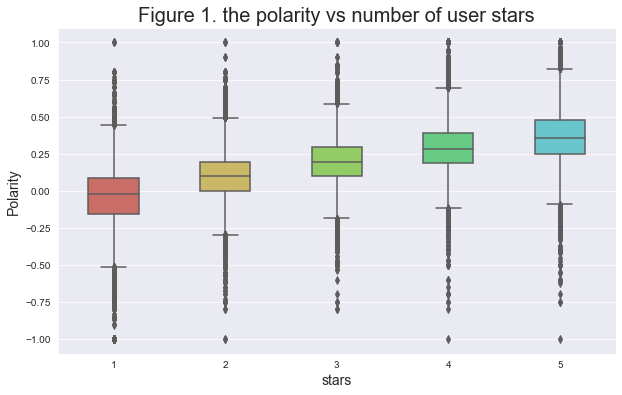

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
sns.set_palette('Set2')

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x="stars",y="Polarity",data=reviews, 
           palette=sns.color_palette("hls", 8),
           width=0.45)
ax.set_xlabel("stars",fontsize=14)
ax.set_ylabel("Polarity",fontsize=14)
ax.set_title("Figure 1. the polarity vs number of user stars",fontsize=20)

**Question:** What do your charts indicate for the effectiveness of our sentiment analysis?

Text(0.5, 1.0, 'Figure 2. the subjectivity vs the number of user stars')

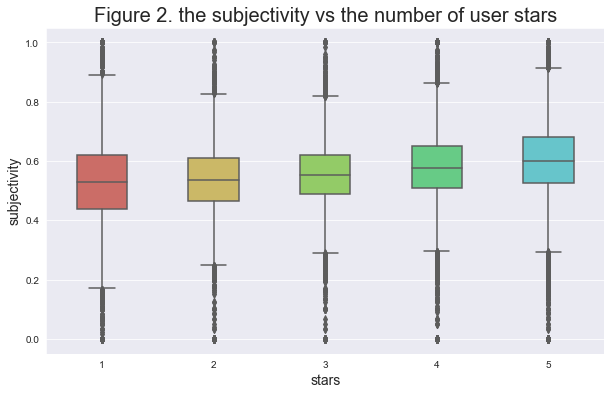

In [132]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x="stars",y="subjectivity",data=reviews, 
           palette=sns.color_palette("hls", 8),
           width=0.45)
ax.set_xlabel("stars",fontsize=14)
ax.set_ylabel("subjectivity",fontsize=14)
ax.set_title("Figure 2. the subjectivity vs the number of user stars",fontsize=20)

### 1.6 The importance of individual words

In this part, I explore the importance and frequency of individual words in Yelp reviews.

We will identify the most common reviews and then plot the average polarity vs the user stars for the reviews where those words occur. 

#### 1.6.1 Select a random sample of the review data

Select 1,000 random rows from the DataFrame holding the review data. Use the `.sample()` function to perform the selection.

In [133]:
import random
rand_sample=reviews.sample(n=1000)
rand_sample.head(5)

,business_id,review_id,stars,text,formatted_text,formatted_text1,Polarity,subjectivity
30259,orrrhqRRUORIzUSxWTveKg,ufltPOJMDLt0VgfKqXRWLA,4,Prestis is a good choice as a coffee shop to s...,"[prestis, good, choice, coffee, shop, sit, hom...",prestis good choice coffee shop sit homework m...,0.314850,0.584023
27512,3r_y_cjRlobJNApmXDJoRg,4Fxmh7a9WRJ_zpkGjnxXEA,4,I really enjoyed this quiet place The Pat Tai...,"[really, enjoyed, quiet, place, pat, tai, exce...",really enjoyed quiet place pat tai excellent h...,0.407143,0.683810
10655,SoCjdgcYyj05tSPWz6MUXg,kYI7dsm_eVXC5pFiJZsaKQ,5,Hole in the wall in a shady looking area will...,"[hole, wall, shady, looking, area, leave, smel...",hole wall shady looking area leave smelling li...,0.219048,0.611905
74614,t2O4Qx74U_IfBzDHJzvUCA,xGdJc5_CqOEsPMpZnBltfA,3,Been here a couple of times for their brunches...,"[couple, times, brunches, bit, pricey, serve, ...",couple times brunches bit pricey serve decent ...,0.261905,0.619048
25461,bMSiHjs2fbKbBNPyuTwhHA,fDZhEcWt7698P3HHcXIw8w,2,Tacos are okay I had the trio cod chicken and ...,"[tacos, okay, trio, cod, chicken, third, fish,...",tacos okay trio cod chicken third fish one mem...,0.044872,0.741026


#### 1.6.2 Re-format the data

Pass the subset of review data from the previous part to the `reshape_data()` function defined below. Explore the result of this function, and in one or two sentences, explain the operation performed by `reshape_data()`. 

In [134]:
def reshape_data(review_subset):
    """
    Reshape the input dataframe of review data.
    """
    from pandas import Series, merge
    
    X = (review_subset['formatted_text']
         .apply(Series)
         .stack()
         .reset_index(level=1, drop=True)
         .to_frame('word'))
    
    
    R = review_subset[['Polarity', 'stars', 'review_id']]
    
    return merge(R, X, left_index=True, right_index=True).reset_index(drop=True)

In [135]:
rand_sample=reshape_data(rand_sample)
rand_sample.head()

,Polarity,stars,review_id,word
0,-0.29697,1,ylR9hDlLTUowUVYgwD9A0A,absolute
1,-0.29697,1,ylR9hDlLTUowUVYgwD9A0A,worst
2,-0.29697,1,ylR9hDlLTUowUVYgwD9A0A,service
3,-0.29697,1,ylR9hDlLTUowUVYgwD9A0A,told
4,-0.29697,1,ylR9hDlLTUowUVYgwD9A0A,45


#### 1.6.3 Calculate the average number of stars and polarity for each word

Using the result from 1.6.2, group by the "word" column, and calculate the following three quantities:
1. the size of each group 
1. the average number of user stars for each word
1. the average polarity for each word

Combine these three results into a single DataFrame object.  


In [136]:
group_sample=rand_sample.groupby(['word','Polarity','stars'])

In [137]:
group_sample.size()

word      Polarity   stars
0         -0.009464  1        1
075        0.212140  2        1
1         -0.376667  1        1
          -0.200000  1        1
          -0.145714  1        1
                             ..
zucchini   0.431391  5        1
           0.442857  5        1
à          0.229167  4        1
小籠湯包       0.289057  5        1
重庆         0.289057  5        1
Length: 52044, dtype: int64

In [138]:
group = rand_sample.groupby("word")['Polarity','stars'].size().reset_index()
group.head()

C:\Users\zheng\AppData\Local\Temp/ipykernel_1716/2858646787.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = rand_sample.groupby("word")['Polarity','stars'].size().reset_index()


,word,0
0,0,1
1,075,1
2,1,51
3,10,42
4,100,7


In [141]:
group_sample1=rand_sample.groupby('word').size().reset_index().rename(columns={0:'size'})
group_sample1.head()

,word,size
0,0,1
1,075,1
2,1,51
3,10,42
4,100,7


In [142]:
group_sample2=rand_sample.groupby(by='word')['Polarity','stars'].agg({'Polarity':'mean','stars':'mean'})
merge_results=pd.merge(group_sample1,group_sample2,on='word')
merge_results.head()

C:\Users\zheng\AppData\Local\Temp/ipykernel_1716/3016240210.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_sample2=rand_sample.groupby(by='word')['Polarity','stars'].agg({'Polarity':'mean','stars':'mean'})


,word,size,Polarity,stars
0,0,1,-0.009464,1.000000
1,075,1,0.212140,2.000000
2,1,51,0.129473,2.980392
3,10,42,0.109139,2.857143
4,100,7,0.078026,2.571429


#### 1.6.4 Select words the occur at least 50 times in reviews

Trim your DataFrame from the last section to only include words that occurred at least 50 times. Remember, when you grouped by the 'word' column, the `size()` function told you how many times each word occurred. 

In [143]:
words_50=merge_results[merge_results['size']>=50]
words_50.head()

,word,size,Polarity,stars
2,1,51,0.129473,2.980392
67,2,99,0.130331,2.959596
116,3,86,0.180794,3.430233
139,4,73,0.177343,3.397260
156,5,67,0.184534,3.447761


#### 1.6.5 Plot the average polarity vs user stars

Use `matplotlib` to make a scatter plot of the average user stars vs average polarity for the words in the data frame from the last section. This will involve two steps:

Loop over each row of the data frame from the last section and for each row:

1. Use `plt.scatter(x, y)` to plot a scatter plot, where x is polarity and y is stars. 
1. Use `plt.text(x, y, word)` to add the corresponding word to each scatter marker.

Using the data frame from section 1.4, add vertical and horizontal lines to your chart that shows the average number of user stars and the average polarity across all reviews in the data set. 


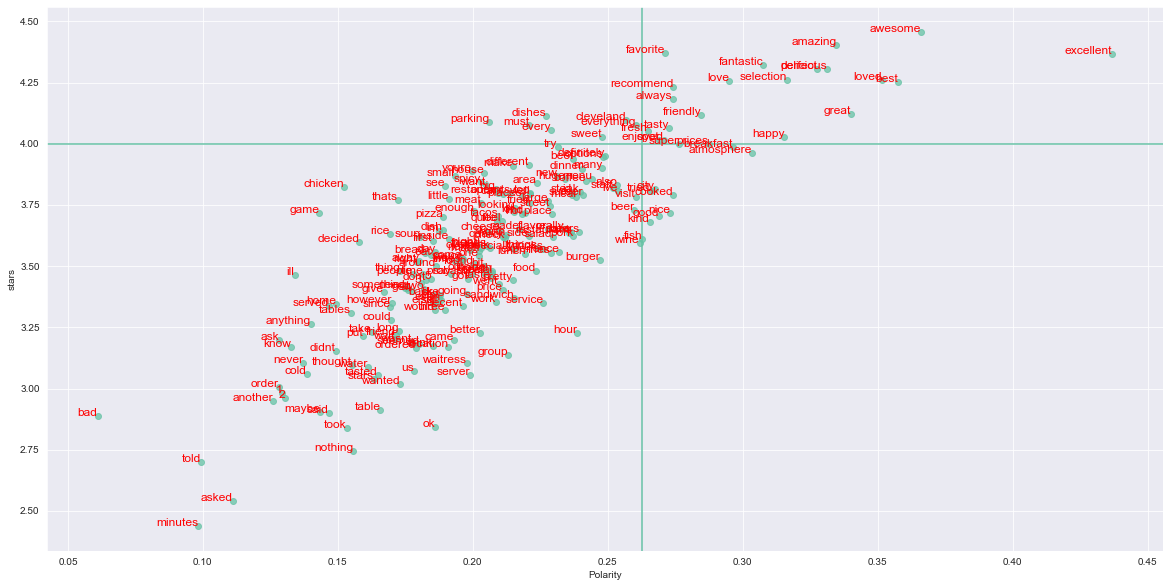

In [170]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(
       y= "stars",
       x= "Polarity",
    data=words_50,
        marker="o",
        alpha=0.75,
    )
stars=words_50["stars"].tolist()
polarity=words_50["Polarity"].tolist()
words=words_50['word'].tolist()

# add text
for i, label in enumerate(words):
    plt.text(polarity[i], stars[i],label,ha='right',size=12,color= 'red') 
    
#add vertical and horizontal lines to your chart that shows the average number of user stars and the average polarity across all reviews in the data set.
ax.axvline(x=reviews['Polarity'].median())
ax.axhline(y=reviews['stars'].median())
ax.set_xlabel("Polarity")
ax.set_ylabel("stars")
ax.grid(True)

## 2. Correlating restaurant data and household income

In this part, I use the census API to download household income data and overlay restaurant locations.

### 2.1 Query the Census API

Use the `cenpy` package to download **median household income in the past 12 months** by census tract from the 2018 ACS 5-year data set for your county of interest.

There are two options to find the correct variable names:
- Search through: https://api.census.gov/data/2018/acs/acs5/variables.html
- Initialize an API connection and use the `.varslike()` function to search for the proper keywords 

At the end of this step, I have a pandas DataFrame holding the income data for all census tracts within the county being analyzed.


In [145]:
import cenpy
acs = cenpy.remote.APIConnection("ACSDT5Y2018")

In [146]:
Cleveland_demo_data = acs.query(
    cols=["B06011_001E"],
    geo_unit="tract:*",
    geo_filter={"state": '39', 
                "county": '035'},
)
Cleveland_demo_data.head()

,B06011_001E,state,county,tract
0,9574,39,035,109801
1,16132,39,035,110801
2,10179,39,035,112301
3,15634,39,035,113801
4,17852,39,035,118101


### 2.2 Download census tracts from the Census and merge the data from Part 2.1

- Use the `cenpy` to set the correct map service and download census tracts for the desired geography
- Merge the downloaded census tracts with the household income DataFrame, making sure to specify the proper columns to perform the merge on.

In [147]:
# Set the map service for pulling geometries
acs.set_mapservice("tigerWMS_ACS2018")

# Census tracts are the 9th layer (index 8 starting from 0)
acs.mapservice.layers[8]

# The base url for the map service API endpoint
acs.mapservice._baseurl

import esri2gpd
# Only Cleveland
where_clause = "STATE = 39 AND COUNTY = 035"

# Create the API url with the layer ID add the end
url = f"{acs.mapservice._baseurl}/8" 

# Query
Cleveland_census_tracts = esri2gpd.get(url, where=where_clause)

# Merge them together
Cleveland_demo_tract = Cleveland_census_tracts.merge(
    Cleveland_demo_data,
    left_on=["STATE", "COUNTY", "TRACT"],
    right_on=["state", "county", "tract"],
)

In [148]:
Cleveland_demo_tract.head()

,geometry,MTFCC,OID,GEOID,STATE,COUNTY,TRACT,BASENAME,NAME,LSADC,...,CENTLON,INTPTLAT,INTPTLON,OBJECTID,STGEOMETRY.AREA,STGEOMETRY.LEN,B06011_001E,state,county,tract
0,"POLYGON ((-81.73036 41.49212, -81.73036 41.491...",G5020,207583714754860,39035103602,39,035,103602,1036.02,Census Tract 1036.02,CT,...,-081.7153373,+41.4939656,-081.7178669,8103,6.520278e+06,16638.096924,36367,39,035,103602
1,"POLYGON ((-81.96966 41.46014, -81.96966 41.458...",G5020,20758387080076,39035189110,39,035,189110,1891.10,Census Tract 1891.10,CT,...,-081.9479869,+41.4705473,-081.9479869,10100,1.111567e+07,15444.088651,46392,39,035,189110
2,"POLYGON ((-81.96986 41.43140, -81.96986 41.431...",G5020,20758387080747,39035189111,39,035,189111,1891.11,Census Tract 1891.11,CT,...,-081.9510294,+41.4549102,-081.9546807,10101,1.271908e+07,17795.315684,50830,39,035,189111
3,"POLYGON ((-81.92163 41.38880, -81.92193 41.382...",G5020,20758387081502,39035190502,39,035,190502,1905.02,Census Tract 1905.02,CT,...,-081.8987388,+41.3918494,-081.8987388,10102,1.224299e+07,30416.151222,23732,39,035,190502
4,"POLYGON ((-81.93436 41.38447, -81.93439 41.383...",G5020,20758387081393,39035190503,39,035,190503,1905.03,Census Tract 1905.03,CT,...,-081.9272562,+41.3906659,-081.9272562,10103,3.142092e+06,7807.617593,39298,39,035,190503


### 2.3 Plot a choropleth map of the household income

Use the built-in `geopandas` `plot()` function. 

Be sure to convert to a reasonable CRS first!

Text(0.5, 1.0, 'a choropleth map of the household income')

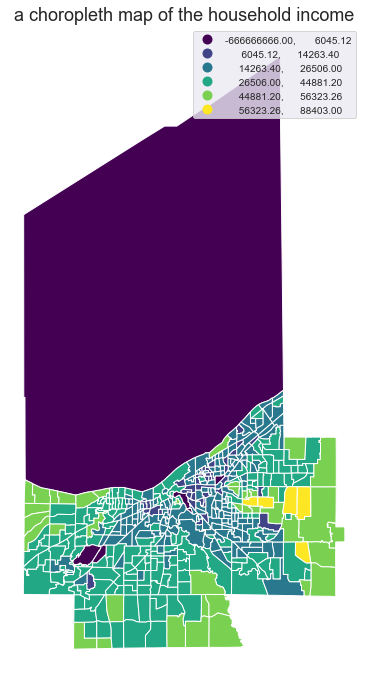

In [152]:
Cleveland_demo_tract = Cleveland_demo_tract.to_crs(epsg=3857)

Cleveland_demo_tract['B06011_001E']=Cleveland_demo_tract['B06011_001E'].astype(float)

import matplotlib.pyplot as plt
# Initialize
fig, ax = plt.subplots(figsize=(12,12))
Cleveland_demo_tract.plot(column='B06011_001E', 
                          scheme='Percentiles',
                          legend=True, 
                          ax=ax, 
                          cmap='viridis')

# Format
ax.set_axis_off()
ax.set_title("a choropleth map of the household income", fontsize=18)

### 2.4 Load the restaurants data

Use the `latitude` and `longitude` columns to create a GeoDataFrame after loading the JSON data.


In [181]:
import pandas as pd
restaurant=pd.read_json("./data/restaurants_cleveland.json.gz",orient='records',lines=True)

import geopandas as gpd
restaurant = restaurant.dropna(subset=['latitude', 'longitude'])
restaurant['Coordinates'] = gpd.points_from_xy(restaurant['longitude'], restaurant['latitude'])
restaurant = gpd.GeoDataFrame(restaurant, 
                            geometry="Coordinates", 
                            crs="EPSG:4326")

restaurant=restaurant.to_crs(epsg=3857)
restaurant.head()

,business_id,latitude,longitude,name,review_count,stars,Coordinates
0,OwXMxqxIy4YoprAjnoUoiA,41.540890,-81.595327,B & M Bar-B-Que Shaw,4,3.5,POINT (-9083150.208 5092453.230)
1,3e0IGa_-zqTemKLc1dbdmg,41.510985,-81.603050,Phusion Cafe,17,3.5,POINT (-9084009.933 5088006.565)
2,lK-wuiq8b1TuU7bfbQZgsg,41.489343,-81.711029,Hingetown,4,3.0,POINT (-9096030.107 5084789.770)
3,Gj8ANgQ6FcWdhrpEwUsxqQ,41.470913,-81.696918,El Taino,4,2.5,POINT (-9094459.311 5082051.274)
4,NbjeMaUoYT_XUB8PWnwLkw,41.479474,-81.694307,Pizza Pan,5,2.0,POINT (-9094168.700 5083323.248)


### 2.5 Overlay restaurants on the income map

Overlay the restaurants and color the points according to the 'stars' column. 

I use the 'coolwarm' color map: blue points will have below-average reviews and red points will have above-average stars. 

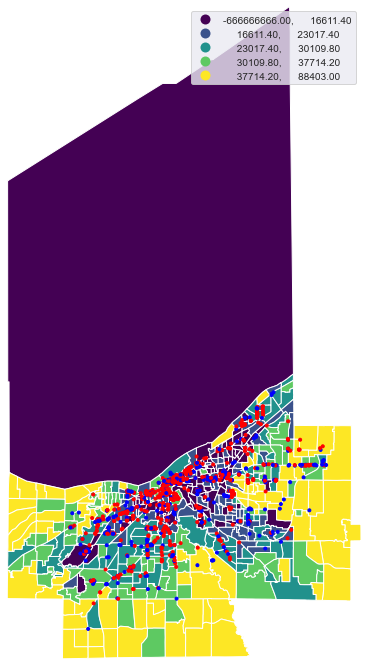

In [153]:
Cleveland_demo_tract.geometry.total_bounds
[xmin, ymin, xmax, ymax] =Cleveland_demo_tract.geometry.total_bounds

import numpy as np
colors=['blue' if i<restaurant['stars'].mean() else 'red' for i in restaurant['stars']]

# Create the figure
fig, ax = plt.subplots(figsize=(12, 12))
#add income map
Cleveland_demo_tract.plot(ax=ax,
                          column='B06011_001E', 
                          legend=True,
                          cmap='viridis',
                         scheme='Quantiles',
                         k=5)
# Plot
restaurant.plot(ax=ax, marker='.',legend=True, c=colors)
# NEW: Set the xlims and ylims
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_axis_off()

### 2.6 Comparing polarity vs. stars geographically

- Merge the restaurants GeoDataFrame with the DataFrame with the 'polarity' column for each review. 
- Make a side-by-side plot with two columns: one subplot shows hex bins giving the polarity of the restaurant review and the other shows hex bins giving the number of stars



In [154]:
compare=restaurant.merge(reviews,on='business_id')

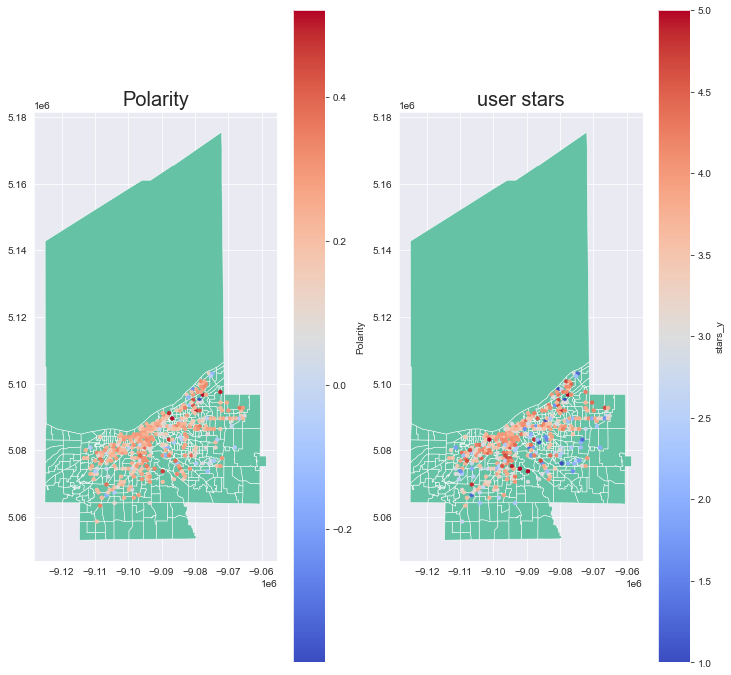

In [172]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12, 12))
# Extract out the x/y coordindates of the Point objects
xcoords = compare.geometry.x
ycoords = compare.geometry.y

Cleveland_demo_tract.plot(
    ax=ax1,
    edgecolor="white",
    linewidth=0.5
)
Cleveland_demo_tract.plot(
    ax=ax2,
    edgecolor="white",
    linewidth=0.5
)

hex_vals1 = ax1.hexbin(xcoords, ycoords, C=compare['Polarity'], gridsize=50,cmap='coolwarm')
hex_vals2 = ax2.hexbin(xcoords, ycoords, C=compare['stars_y'], gridsize=50,cmap='coolwarm')

polarity=fig.colorbar(hex_vals1, ax=ax1)
polarity.set_label('Polarity')
stars=fig.colorbar(hex_vals2, ax=ax2)
stars.set_label('stars_y')
ax1.set_title("Polarity",fontsize=20)
ax2.set_title("user stars",fontsize=20)

plt.show()